## Pima Indians - diabetes prediction
## Neural Network for binary classification

                                                                                                  BY: KARIMA TAJIN

In [30]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.models import model_from_json
from keras import optimizers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import os

# set random seed for reproducibility
np.random.seed(7)

# change the operating system directory
os.chdir("/Users/karimaidrissi/Desktop/DSSA 5104 DL/week13")
# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# splitting Pima-Indians-diabetes dataset into observed features(input) and targets variable(output)
X = dataset[:,0:8] #input
Y = dataset[:,8] #output

# PART I : SET UP DROPOUT 

##  Dropout rate  and Validation_split equal to 10% 

In [31]:
#######################################
##### Architecture of the model ######
######################################

# create a binary classification model 
model = Sequential()
# Dropout used in Neural Network to reduce overfitting and improve generalization error 
# Adding Dropout layer between 8 inputs(or visible layer) and 10 first hidden layer
# Dropout rate is set to 10% means that one in 10 inputs will be randomly excluded from each update cycle 
model.add(Dropout(0.1,input_shape=(8,)))
# Adding relu function to the first 10 hidden layers, also a constraint is imposed on the weights of hidden layers
# ensuring that the maximum norm of the weights doesn not exceed a value of 3
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Adding the second hidden layer with a constraint doesn't exceed 3 also adding normal distribution for intializing the weights 
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Adding the last output layer with the activation function sigmoid
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# compiling the model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model by passing features and target variable with 1000 iterations
# setting validation_split to separate 10% of the training data into a validation dataset that can be used to evaluate our model
history=model.fit(X,Y,validation_split=0.10,epochs=1000,verbose=0)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

##########################################
######## Save Model to disk #############
#########################################

# Save the model structure as json format
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file 
model.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 29us/step

accuracy: 78.78%
Saved model to disk
Confusion Matrix
True negatives:  460
False negatives:  123
False positives:  40
True positives:  145


- In my working directory the network weights is saved in json format
- the accuracy of our model is 78.78% 
- The confusion matrix can be interpreted as follows out of 768 observations in Pima-Indians-Diabetes dataset, 605 observation were correctly predicted while 163 were incorrectly predicted
- We can also calculate the accuracy by adding True negatives and True positive then divide the sum by the total number of observations: 605/768= 0.7878 which gives 78.78%

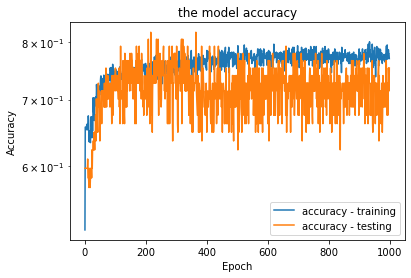

In [32]:
# Plotting the accuracy of training and testing our model
import matplotlib.pyplot as plt # importing matplotlib library
accuracy_training = history.history['accuracy']
loss = history.history['loss']
accuracy_testing = history.history['val_accuracy']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('the model accuracy')
plt.legend()
plt.show()

- Overall, the accuracy model on training and testing dataset shows that the model has better performance on the training dataset than testing.
- We can see clearly that the testing accuracy increases to certain points up to 400 epochs then begin to degrade, this's possibly a sign of overfitting

## Adjusting the Dropout and validation_split to 20%

In [33]:
#######################################
##### Architecture of the model ######
######################################

# create a binary classification model 
model = Sequential()
# Dropout used in Neural Network to reduce overfitting and improve generalization error 
# Adding Dropout layer between 8 inputs(or visible layer) and 10 first hidden layer
# Dropout rate is set to 20% means that one in 5 inputs will be randomly excluded from each update cycle 
model.add(Dropout(0.5,input_shape=(8,)))
# Adding relu function to the first 10 hidden layers, also a constraint is imposed on the weights of hidden layers
# ensuring that the maximum norm of the weights doesn not exceed a value of 3
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Adding the second hidden layer with a constraint doesn't exceed 3 also adding normal distribution for intializing the weights 
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Adding the last output layer with the activation function sigmoid
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# compiling the model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model by passing features and target variable with 1000 iterations
# setting validation_split to separate 20% of the training data into a validation dataset that can be used to evaluate our model
history=model.fit(X,Y,validation_split=0.20,epochs=1000,verbose=0)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

##########################################
######## Save Model to disk #############
#########################################

# Save the model structure as json format
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file 
model.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 24us/step

accuracy: 65.10%
Saved model to disk
Confusion Matrix
True negatives:  500
False negatives:  268
False positives:  0
True positives:  0


- In my working directory the network weights is saved in json format
- the accuracy of our model is 65.10% 
- The confusion matrix can be interpreted as follows out of 768 observations in Pima-Indians-Diabetes dataset, 500 observation were correctly predicted while 268 were incorrectly predicted
- We can also calculate the accuracy by adding True negatives and True positive then divide the sum by the total number of observations: 500/768= 0.6510 which gives 65.10%

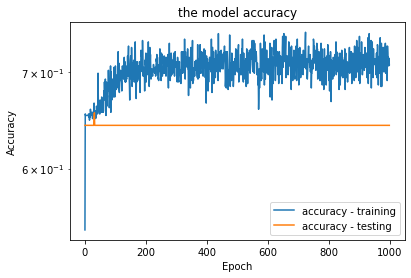

In [34]:
# Plotting the accuracy of training and testing our model
import matplotlib.pyplot as plt # importing matplotlib library
accuracy_training = history.history['accuracy']
loss = history.history['loss']
accuracy_testing = history.history['val_accuracy']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('the model accuracy')
plt.legend()
plt.show()

- The accuracy model on training and testing dataset shows that the model has better performance on the training dataset than testing which means that the model is overfitted 

## Adjusting the Dropout and validation_split to 30%

In [35]:
#######################################
##### Architecture of the model ######
######################################

# create a binary classification model 
model = Sequential()
# Dropout used in Neural Network to reduce overfitting and improve generalization error 
# Adding Dropout layer between 8 inputs(or visible layer) and 10 first hidden layer
# Dropout rate is set to 30% means that three in 10 inputs will be randomly excluded from each update cycle 
model.add(Dropout(0.3,input_shape=(8,)))
# Adding relu function to the first 10 hidden layers, also a constraint is imposed on the weights of hidden layers
# ensuring that the maximum norm of the weights doesn not exceed a value of 3
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Adding the second hidden layer with a constraint doesn't exceed 3 also adding normal distribution for intializing the weights 
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Adding the last output layer with the activation function sigmoid
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# compiling the model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model by passing features and target variable with 1000 iterations
# setting validation_split to separate 30% of the training data into a validation dataset that can be used to evaluate our model
history=model.fit(X,Y,validation_split=0.30,epochs=1000,verbose=0)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

##########################################
######## Save Model to disk #############
#########################################

# Save the model structure as json format
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file 
model.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 26us/step

accuracy: 67.58%
Saved model to disk
Confusion Matrix
True negatives:  499
False negatives:  248
False positives:  1
True positives:  20


- In my working directory the network weights is saved in json format
- the accuracy of our model is 67.58% 
- The confusion matrix can be interpreted as follows out of 768 observations in Pima-Indians-Diabetes dataset, 519 observation were correctly predicted while 249 were incorrectly predicted
- We can also calculate the accuracy by adding True negatives and True positive then divide the sum by the total number of observations: 519/768= 0.6758 which gives 67.58%

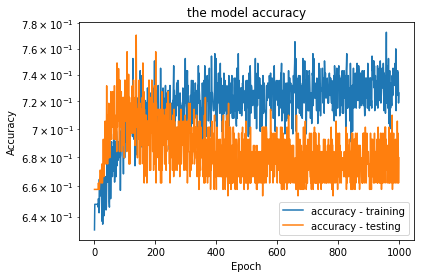

In [36]:
# Plotting the accuracy of training and testing our model
import matplotlib.pyplot as plt # importing matplotlib library
accuracy_training = history.history['accuracy']
loss = history.history['loss']
accuracy_testing = history.history['val_accuracy']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('the model accuracy')
plt.legend()
plt.show()

- Overall, Dropout layers is an effective way to prevent or decrease overfitting in our model


# PART II : SET UP CHECKPOINTING 

##  Dropout rate and Validation_split equal to 10% 

In [38]:
from keras.callbacks import ModelCheckpoint

#######################################
##### Architecture of the model ######
######################################

# create a binary classification model 
model = Sequential()
# Dropout used in Neural Network to reduce overfitting and improve generalization error 
# Adding Dropout layer between 8 inputs(or visible layer) and 10 first hidden layer
# Dropout rate is set to 10% means that one in 10 inputs will be randomly excluded from each update cycle 
model.add(Dropout(0.1,input_shape=(8,)))
# Adding relu function to the first 10 hidden layers, also a constraint is imposed on the weights of hidden layers
# ensuring that the maximum norm of the weights doesn not exceed a value of 3
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Adding the second hidden layer with a constraint doesn't exceed 3 also adding normal distribution for intializing the weights 
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Adding the last output layer with the activation function sigmoid
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# compiling the model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


##########################################
######## Save Model to disk #############
#########################################

# Save model structure as json format
print('===================')
print('Saving model to disk')
print('===================')
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
    
##########################################
######## Set up Checkpointing ###########
#########################################  

# Checkpointing is an approach where a snapshot of the state of the system is taken in case of the system failure or if there's any problem
# the good use of checkpointing is to output the model weights each time an improvement is observed during training

filepath = 'weights.best.hdh5' # weights are stored in a hdh5 file 
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=True,mode='max')
callbacks_list = [checkpoint]

# train the model by passing features and target variable with 1000 iterations
# setting validation_split to separate 10% of the training data into a validation dataset that can be used to evaluate our model
history=model.fit(X,Y,validation_split=0.1,epochs=1000,verbose=0,callbacks=callbacks_list)

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])


Saving model to disk


/Users/karimaidrissi/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


768/768 [==============================] - 0s 27us/step

accuracy: 74.87%
Confusion Matrix
True negatives:  491
False negatives:  184
False positives:  9
True positives:  84


- In my working directory the network weights is saved in jason and h5 format
- the accuracy of our model is 74.87% 
- The confusion matrix can be interpreted as follows out of 768 observations in Pima-Indians-Diabetes dataset, 575 observation were correctly predicted while 193 were incorrectly predicted
- We can also calculate the accuracy by adding True negatives and True positive then divide the sum by the total number of observations: 575/768= 0.7487 which gives 74.87%

## Plotting the accuracy of the model 

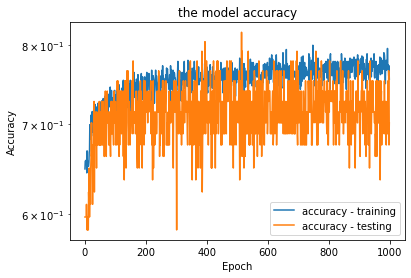

In [41]:
accuracy_training = history.history['accuracy']
loss = history.history['loss']
accuracy_testing = history.history['val_accuracy']
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title("the model accuracy")
plt.legend()
plt.show()

- the model accuracy on training and testing dataset shows that the model has better performance on the training dataset than testing, we can decrease overfitting by setting another Dropout.
- when I was reading an article about overfitting, I found that early stopping is another helpful technique to stop training when a monitored quantity stopped improving in the model